# Gole
This research project aims to analyze the trends in the Lisbon Airbnb market. It will identify pricing patterns, availability trends, and guest preferences to predict future market movements. This analysis will provide actionable insights for hosts to optimize their listings for increased revenue and occupancy rates.
# Hypothesis
Hypothesis 1 (H1): There are significant differences in mean review scores across different room types

Null Hypothesis 1 (H0): There are no significant differences in mean review scores across different room types

Hypothesis 2 (H2): Guest preferences vary significantly by property type, with entire homes/apartments receiving higher scores than private or shared rooms

Null Hypothesis 2 (H0): Guest preferences don‘t vary by property type.

# Loading Libraries

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import statsmodels.api as sm
import functions
import numpy as np
import scipy.stats as stats

# Loading Datasets

In [4]:
df1 = pd.read_csv("../Data/Raw/listings dec21.csv")

In [5]:
df2 = pd.read_csv("../Data/Raw/listings jun21.csv")

In [6]:
df3 = pd.read_csv("../Data/Raw/listings mar21.csv")

In [7]:
df4 = pd.read_csv("../Data/Raw/listings sep21.csv")

# Concatenating Datasets

In [8]:
df1.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [9]:
df2.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [10]:
df3.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [11]:
df3.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [12]:
df1234 = pd.concat([df1, df2, df3, df4], axis=0)
display(df1234)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6499,https://www.airbnb.com/rooms/6499,20211208225323,2021-12-10,Belém 1 Bedroom Historical Apartment,"This apartment is all about Location, next to ...","To get to the city center, tram 15 stops in f...",https://a0.muscache.com/pictures/6422ee92-c84e...,14455,https://www.airbnb.com/users/show/14455,...,4.97,4.81,4.52,NaN,t,1,1,0,0,0.36
1,25659,https://www.airbnb.com/rooms/25659,20211208225323,2021-12-09,Heart of Alfama Lisbon Center - Cœur de l'Alfama,*** 100% Covid 19 cleaning protocols <br />NON...,Alfama is the oldest and most picturesque quar...,https://a0.muscache.com/pictures/a4c86b5f-ceaf...,107347,https://www.airbnb.com/users/show/107347,...,4.97,4.88,4.82,56539/AL.,t,1,1,0,0,1.37
2,29248,https://www.airbnb.com/rooms/29248,20211208225323,2021-12-09,Apartamento Alfama com vista para o rio!,<b>The space</b><br />Located in the city cent...,NaN,https://a0.muscache.com/pictures/4212cc65-2046...,125768,https://www.airbnb.com/users/show/125768,...,4.74,4.82,4.61,23535/AL,t,1,1,0,0,2.53
3,29396,https://www.airbnb.com/rooms/29396,20211208225323,2021-12-09,Alfama Hill - Boutique apartment,Feel at home in the historic centre of Lisbon....,Great neighborhood in the old part of town. Am...,https://a0.muscache.com/pictures/163913/7d622c...,126415,https://www.airbnb.com/users/show/126415,...,4.91,4.88,4.75,28737/AL,t,1,1,0,0,2.57
4,29720,https://www.airbnb.com/rooms/29720,20211208225323,2021-12-09,TheHOUSE - Your luxury home,"A house at the top of an anonimous building, T...","Location in the city's Embassies area, near en...",https://a0.muscache.com/pictures/7c977dcc-57d0...,128075,https://www.airbnb.com/users/show/128075,...,4.97,4.83,4.60,55695/AL,f,2,2,0,0,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19100,52262957,https://www.airbnb.com/rooms/52262957,20210916032316,2021-09-16,Quarto perto do jardim Príncipe Real,<b>License number</b><br />Exempt,NaN,https://a0.muscache.com/pictures/c925a0f3-eec0...,189741039,https://www.airbnb.com/users/show/189741039,...,NaN,NaN,NaN,Exempt,f,2,0,2,0,NaN
19101,52263789,https://www.airbnb.com/rooms/52263789,20210916032316,2021-09-16,Studio Room in the Center,Simplifique neste espaço tranquilo e de locali...,NaN,https://a0.muscache.com/pictures/e3fd66b0-4417...,422738531,https://www.airbnb.com/users/show/422738531,...,NaN,NaN,NaN,34521/AL,t,3,1,2,0,NaN
19102,52275675,https://www.airbnb.com/rooms/52275675,20210916032316,2021-09-16,Best location in Ericeira Praia do Sul Apartment,Brand newly decorated luxurious 2 bedroom apar...,NaN,https://a0.muscache.com/pictures/dd749e12-7bce...,157128049,https://www.airbnb.com/users/show/157128049,...,NaN,NaN,NaN,16836/AL,f,1,1,0,0,NaN
19103,52277785,https://www.airbnb.com/rooms/52277785,20210916032316,2021-09-16,NEW!! Amazing Studio with Bathtub in Baixa,Studio/Loft with Bathtub in Baixa - Beautiful ...,"Baixa is start point to discover Lisbon, the m...",https://a0.muscache.com/pictures/miso/Hosting-...,415596856,https://www.airbnb.com/users/show/415596856,...,NaN,NaN,NaN,37452/AL,t,5,5,0,0,NaN


# Data Exploration and Cleaning

In [13]:
df1234.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6499,https://www.airbnb.com/rooms/6499,20211208225323,2021-12-10,Belém 1 Bedroom Historical Apartment,"This apartment is all about Location, next to ...","To get to the city center, tram 15 stops in f...",https://a0.muscache.com/pictures/6422ee92-c84e...,14455,https://www.airbnb.com/users/show/14455,...,4.97,4.81,4.52,NaN,t,1,1,0,0,0.36
1,25659,https://www.airbnb.com/rooms/25659,20211208225323,2021-12-09,Heart of Alfama Lisbon Center - Cœur de l'Alfama,*** 100% Covid 19 cleaning protocols <br />NON...,Alfama is the oldest and most picturesque quar...,https://a0.muscache.com/pictures/a4c86b5f-ceaf...,107347,https://www.airbnb.com/users/show/107347,...,4.97,4.88,4.82,56539/AL.,t,1,1,0,0,1.37
2,29248,https://www.airbnb.com/rooms/29248,20211208225323,2021-12-09,Apartamento Alfama com vista para o rio!,<b>The space</b><br />Located in the city cent...,NaN,https://a0.muscache.com/pictures/4212cc65-2046...,125768,https://www.airbnb.com/users/show/125768,...,4.74,4.82,4.61,23535/AL,t,1,1,0,0,2.53
3,29396,https://www.airbnb.com/rooms/29396,20211208225323,2021-12-09,Alfama Hill - Boutique apartment,Feel at home in the historic centre of Lisbon....,Great neighborhood in the old part of town. Am...,https://a0.muscache.com/pictures/163913/7d622c...,126415,https://www.airbnb.com/users/show/126415,...,4.91,4.88,4.75,28737/AL,t,1,1,0,0,2.57
4,29720,https://www.airbnb.com/rooms/29720,20211208225323,2021-12-09,TheHOUSE - Your luxury home,"A house at the top of an anonimous building, T...","Location in the city's Embassies area, near en...",https://a0.muscache.com/pictures/7c977dcc-57d0...,128075,https://www.airbnb.com/users/show/128075,...,4.97,4.83,4.60,55695/AL,f,2,2,0,0,0.48


In [14]:
df1234.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76716 entries, 0 to 19104
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            76716 non-null  int64  
 1   listing_url                                   76716 non-null  object 
 2   scrape_id                                     76716 non-null  int64  
 3   last_scraped                                  76716 non-null  object 
 4   name                                          76679 non-null  object 
 5   description                                   76640 non-null  object 
 6   neighborhood_overview                         50239 non-null  object 
 7   picture_url                                   76716 non-null  object 
 8   host_id                                       76716 non-null  int64  
 9   host_url                                      76716 non-null  obje

In [15]:
df1234.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,7.671600e+04,7.671600e+04,7.671600e+04,75797.000000,75797.000000,76716.000000,76716.000000,76716.000000,0.0,72744.000000,...,63711.000000,63694.000000,63701.000000,63696.000000,63700.000000,76716.000000,76716.000000,76716.000000,76716.000000,64206.000000
mean,2.573700e+07,2.021075e+13,1.094119e+08,19.663430,19.663430,38.760366,-9.207556,4.058202,NaN,1.760461,...,5.908855,6.029316,6.037917,5.968279,5.786913,14.094504,11.720098,2.040709,0.145419,1.204003
std,1.442658e+07,3.356339e+08,1.118982e+08,68.503167,68.503167,0.111341,0.113498,2.433942,NaN,1.215600,...,2.150304,2.187554,2.184271,2.153541,2.097659,36.962308,36.525777,6.794692,1.081371,1.361551
min,6.499000e+03,2.021031e+13,1.445500e+04,0.000000,0.000000,38.676449,-9.498520,0.000000,NaN,1.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.444028e+07,2.021031e+13,1.546392e+07,1.000000,1.000000,38.710950,-9.281456,2.000000,NaN,1.000000,...,4.700000,4.830000,4.830000,4.730000,4.600000,1.000000,1.000000,0.000000,0.000000,0.260000
50%,2.528025e+07,2.021061e+13,6.622479e+07,4.000000,4.000000,38.717540,-9.147110,4.000000,NaN,1.000000,...,4.920000,4.970000,4.980000,4.910000,4.800000,4.000000,2.000000,0.000000,0.000000,0.780000
75%,3.732928e+07,2.021092e+13,1.842042e+08,11.000000,11.000000,38.741280,-9.134920,5.000000,NaN,2.000000,...,6.000000,6.000000,6.000000,7.000000,6.000000,10.000000,6.000000,1.000000,0.000000,1.760000
max,5.373121e+07,2.021121e+13,4.351773e+08,2249.000000,2249.000000,39.302140,-8.840090,16.000000,NaN,32.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,281.000000,281.000000,85.000000,18.000000,64.440000


In [16]:
df1234['host_since'].unique()

array(['2009-04-22', '2010-04-12', '2010-05-16', ..., '2021-06-17',
       '2021-03-18', '2021-08-11'], dtype=object)

In [17]:
df1234['accommodates'].unique()

array([ 4,  3, 16,  6,  2,  7,  8,  5,  1, 10, 12,  9, 15, 14, 11, 13,  0])

Based on the summary statistics, the dataset seems quite comprehensive and contains a broad range of features that could be valuable for analysis.

The dataset comprises 63,323 observations, which is relatively large, offering the potential for meaningful insights.

The time range for the dataset spans from 22-04-2009 to 28-11-2021.

The latitude and longitude columns provide specific geographical data, which could be helpful for geographical analysis.

The accommodates column feature ranges from 1 to 16, offering insights into the size of the listings.

The dataset includes review scores for location and value, which opens up the possibility of exploring how these factors influence the popularity or pricing of listings.

# Data Cleaning

In [18]:
df1234.isnull()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19100,False,False,False,False,False,False,True,False,False,False,...,True,True,True,False,False,False,False,False,False,True
19101,False,False,False,False,False,False,True,False,False,False,...,True,True,True,False,False,False,False,False,False,True
19102,False,False,False,False,False,False,True,False,False,False,...,True,True,True,False,False,False,False,False,False,True
19103,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,True


In [19]:
df1234.isna().any()

id                                              False
listing_url                                     False
scrape_id                                       False
last_scraped                                    False
name                                             True
                                                ...  
calculated_host_listings_count                  False
calculated_host_listings_count_entire_homes     False
calculated_host_listings_count_private_rooms    False
calculated_host_listings_count_shared_rooms     False
reviews_per_month                                True
Length: 74, dtype: bool

In [20]:
df1234.isna().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
name                                               37
                                                ...  
calculated_host_listings_count                      0
calculated_host_listings_count_entire_homes         0
calculated_host_listings_count_private_rooms        0
calculated_host_listings_count_shared_rooms         0
reviews_per_month                               12510
Length: 74, dtype: int64

In [21]:
df1234.isna().sum(axis=1)

0         4
1         2
2         4
3         3
4         2
         ..
19100    16
19101    18
19102    15
19103    14
19104    14
Length: 76716, dtype: int64

Once we have identified the missing values, we need to come up with a plan to deal with them. For example, for numerical columns, we can use the mean, median, or mode to replace missing values. On the other hand, for categorical data, we can replace missing values with the most frequent category or assign a value such as "Unknown".

In [22]:
#df1234[''].fillna(df1234[''].median(), inplace=True) #Should I clean all the data, or only the specific columns that I have used?

# Creating New Features

In [23]:
list(df1234.columns)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'description',
 'neighborhood_overview',
 'picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'has_availability',
 'availability_30',
 'availa

In [24]:
for column in df1234.columns:
    print(f'{column} : {df1234[column].nunique()}')

id : 23662
listing_url : 23662
scrape_id : 4
last_scraped : 26
name : 24481
description : 24699
neighborhood_overview : 11634
picture_url : 25279
host_id : 9830
host_url : 9830
host_name : 3768
host_since : 3296
host_location : 1045
host_about : 5164
host_response_time : 4
host_response_rate : 76
host_acceptance_rate : 97
host_is_superhost : 2
host_thumbnail_url : 10606
host_picture_url : 10606
host_neighbourhood : 162
host_listings_count : 154
host_total_listings_count : 154
host_verifications : 327
host_has_profile_pic : 2
host_identity_verified : 2
neighbourhood : 551
neighbourhood_cleansed : 129
neighbourhood_group_cleansed : 16
latitude : 11027
longitude : 13054
property_type : 106
room_type : 4
accommodates : 17
bathrooms : 0
bathrooms_text : 54
bedrooms : 20
beds : 35
amenities : 71480
price : 740
minimum_nights : 65
maximum_nights : 206
minimum_minimum_nights : 70
maximum_minimum_nights : 78
minimum_maximum_nights : 191
maximum_maximum_nights : 199
minimum_nights_avg_ntm : 351


In [25]:
df1234['first_review'] = pd.to_datetime(df1234['first_review'], errors='coerce')

In [26]:
df1234['first_review_year'] = df1234['first_review'].dt.year
display(df1234['first_review_year'])

0        2014.0
1        2014.0
2        2011.0
3        2012.0
4        2011.0
          ...  
19100       NaN
19101       NaN
19102       NaN
19103       NaN
19104       NaN
Name: first_review_year, Length: 76716, dtype: float64

In [27]:
df_clean = df1234.dropna(subset=['first_review_year'])

In [28]:
mode = df1234['first_review_year'].mode()
df1234['first_review_year'].fillna(mode, inplace=True)
display(df1234['first_review_year'])

/var/folders/sy/44z17tzs0lbfyhpp1k3p508c0000gn/T/ipykernel_92451/3503228260.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1234['first_review_year'].fillna(mode, inplace=True)


0        2014.0
1        2014.0
2        2011.0
3        2012.0
4        2011.0
          ...  
19100       NaN
19101       NaN
19102       NaN
19103       NaN
19104       NaN
Name: first_review_year, Length: 76716, dtype: float64

In [29]:
yearly_counts = df_clean['first_review_year'].value_counts().sort_index()
display(yearly_counts)

first_review_year
2010.0        2
2011.0      111
2012.0      500
2013.0     1301
2014.0     2774
2015.0     5047
2016.0     7723
2017.0     9780
2018.0    12431
2019.0    13330
2020.0     6054
2021.0     5153
Name: count, dtype: int64

# Data Visualization and Interpreting Results

/var/folders/sy/44z17tzs0lbfyhpp1k3p508c0000gn/T/ipykernel_92451/3318992000.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=first_review_year_counts.index, y=first_review_year_counts.values, palette="viridis")


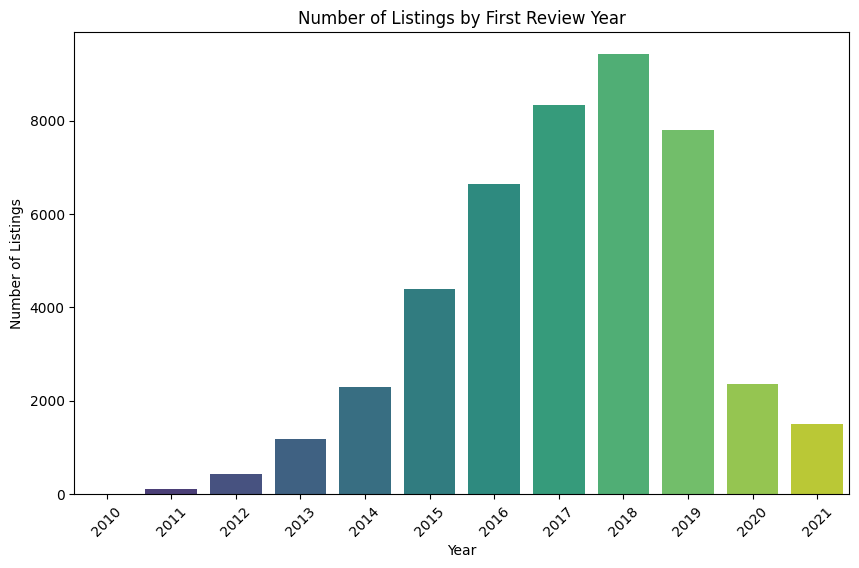

In [30]:
row_indexes_to_delete = df1234[df1234['first_review_year'].isna()].index
df1234.drop(row_indexes_to_delete, axis=0, inplace=True)
df1234['first_review_year'] = df1234['first_review_year'].astype(int)
first_review_year_counts = df1234['first_review_year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=first_review_year_counts.index, y=first_review_year_counts.values, palette="viridis")
plt.xlabel('Year')
plt.ylabel('Number of Listings')
plt.title('Number of Listings by First Review Year')
plt.xticks(rotation=45)
plt.show()

The bar plot illustrates the number of Airbnb listings in Lisbon based on the year they received their first review, spanning from 2010 to 2021.

The graph shows a clear increase in the number of listings from 2010 to 2019. Each year within this period saw a rise in new listings compared to the previous year, indicating a thriving and expanding market for Airbnb in Lisbon.

The peak of this growth occurred in 2019, when the highest number of listings received their first review. This suggests that Airbnb's popularity and market penetration in Lisbon reached its peak in 2019.

A noticeable decline in the number of listings is observed in 2020, with the number of new listings almost halved compared to 2019. This decline is likely due to the COVID-19 pandemic.

The number of listings seems to have stabilized in 2021, with only a slight decline compared to 2020, but not as drastic as the previous year's drop. This could suggest that the market is beginning to adapt to the new conditions brought about by the pandemic.

From 2010 to 2013, the number of listings was relatively low, which is typical for a new market. However, as awareness and adoption of Airbnb increased, so did the number of listings.

In [31]:
df1234['host_since'].unique()

array(['2009-04-22', '2010-04-12', '2010-05-16', ..., '2021-06-30',
       '2021-08-01', '2018-02-17'], dtype=object)

In [32]:
df1234['host_is_superhost'].unique()

array(['f', 't', nan], dtype=object)

In [33]:
df1234['host_since'] = pd.to_datetime(df1234['host_since'])

In [34]:
df1234['host_is_superhost'] = df1234['host_is_superhost'].map({'t': True, 'f': False})

In [35]:
df1234['last_scraped'] = pd.to_datetime(df1234['last_scraped'])
latest_date = df1234['last_scraped'].max()

In [36]:
df1234['host_tenure'] = (latest_date - df1234['host_since']).dt.days

In [37]:
display (df1234['host_tenure'])

0        4623.0
1        4268.0
2        4234.0
3        4233.0
4        4231.0
          ...  
18795     145.0
18796     145.0
18829     759.0
18884    1400.0
18997    1060.0
Name: host_tenure, Length: 44409, dtype: float64

In [38]:
df1234['host_tenure_years'] = (df1234['host_tenure'] / 365.25).round()

median_tenure_years = df1234['host_tenure_years'].median()
df1234['host_tenure_years'] = df1234['host_tenure_years'].fillna(median_tenure_years).astype(int)

In [39]:
df1234['host_tenure_years'] = (df1234['host_tenure'] / 365.25).round()

df1234 = df1234.dropna(subset=['host_tenure_years'])

df1234['host_tenure_years'] = df1234['host_tenure_years'].astype(int)
display(df1234['host_tenure_years'])

0        13
1        12
2        12
3        12
4        12
         ..
18795     0
18796     0
18829     2
18884     4
18997     3
Name: host_tenure_years, Length: 43877, dtype: int64

In [40]:
tenure_stats = df1234['host_tenure_years'].describe()
print(tenure_stats)

count    43877.000000
mean         6.263076
std          2.288179
min          0.000000
25%          5.000000
50%          6.000000
75%          8.000000
max         13.000000
Name: host_tenure_years, dtype: float64


This column represents the number of years each host has been active on the Airbnb platform.

After cleaning and processing the data, the dataset has a total of 75,797 records, which means we have the tenure data for 75,797 hosts.

On average, hosts in Lisbon have been active on Airbnb for around 5.71 years.

The standard deviation is approximately 2.55 years, which measures the variation or dispersion of host tenures from the mean. A higher standard deviation would indicate that the host tenures are more spread out over a broader range of years. Conversely, a lower standard deviation indicates that the tenures are more clustered around the mean. In this particular case, a standard deviation of 2.55 years suggests a moderate spread in how long hosts have been active.

The minimum value is 0 years, indicating that some hosts are new to the platform (they started within the last year analyzed).

25% of the hosts have been on Airbnb for four years or less.

The median tenure is 6 years, meaning that half of the hosts have been active for 6 years or fewer, and the other half have been active for more than 6 years.

75% of the hosts have been on Airbnb for 8 years or less.

The maximum value is 13 years, which suggests that the most experienced host on the platform has been active for 13 years.

In summary, the average host in Lisbon has been active on Airbnb for approximately 4 to 8 years, with a moderate variety in the tenure lengths, including both new and experienced hosts in the dataset.

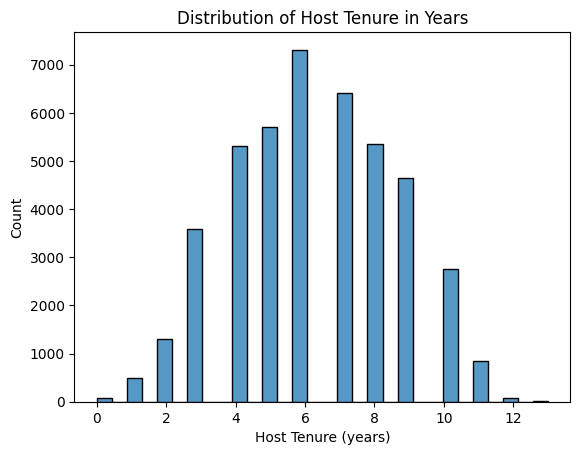

In [41]:
sns.histplot(df1234['host_tenure_years'], bins=30)
plt.xlabel('Host Tenure (years)')
plt.ylabel('Count')
plt.title('Distribution of Host Tenure in Years')
plt.show()

The histogram illustrates the distribution of host tenure in years for Airbnb hosts in Lisbon.

The distribution has multiple peaks, with a notable peak around 6 years of tenure. This suggests that a significant number of hosts joined Airbnb approximately 6 years ago, based on the latest data point in the dataset.

The distribution is right-skewed, with fewer hosts having a very long tenure (10-13 years). This is expected as fewer hosts would have joined Airbnb when it was a relatively new platform, founded in 2008.

A small number of hosts with 0-2 years of tenure suggests either a slower rate of new hosts joining Airbnb in the past couple of years or that these hosts might have joined but not yet completed a full year at the time of data collection.

The largest groups are hosts with 4-8 years of tenure, indicating a period of rapid growth for Airbnb in Lisbon during that time frame.

There are relatively few hosts with more than 10 years of tenure, which aligns with Airbnb's global expansion history; naturally, there would be fewer hosts from the platform's early years.

Most hosts have been on the platform for a significant amount of time, indicating that the Lisbon Airbnb market is quite mature with experienced hosts.

This distribution can provide insights into market saturation and growth trends and inform strategies for engaging new vs. established hosts. It may also influence considerations for marketing and support programs tailored to different host tenure segments.

/var/folders/sy/44z17tzs0lbfyhpp1k3p508c0000gn/T/ipykernel_92451/1700460302.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='host_is_superhost', y='host_tenure_years', data=df1234, palette=palette_colors)


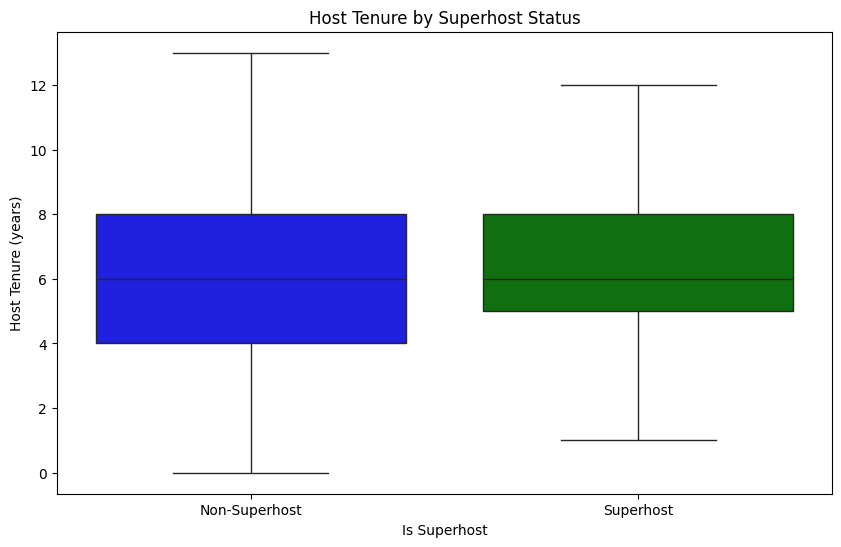

In [42]:
palette_colors = ["blue", "green"]

plt.figure(figsize=(10, 6))
sns.boxplot(x='host_is_superhost', y='host_tenure_years', data=df1234, palette=palette_colors)
plt.xlabel('Is Superhost')
plt.ylabel('Host Tenure (years)')
plt.title('Host Tenure by Superhost Status')
plt.xticks([0, 1], ['Non-Superhost', 'Superhost'])
plt.show()

The following is a comparison of the distribution of host tenure between Airbnb superhosts and non-superhosts using a box plot.

The median tenure is slightly higher for superhosts than non-superhosts, indicating that superhosts have been active on the platform for a longer period of time.

The Interquartile Range is wider for non-superhosts, which suggests a wider spread of tenure within this group. However, superhosts have a narrower Interquartile Range, meaning that their tenure lengths are more consistently clustered around the median.

Both superhosts and non-superhosts have a wide range of tenure, but non-superhosts show a slightly broader range. This implies that there are non-superhosts who have been on the platform for very short and very long periods.

Overall, superhosts tend to have longer tenure on Airbnb. This could be related to achieving superhost status requiring a certain level of experience and consistent hosting performance, which might naturally correlate with time spent on the platform.

While superhosts generally have been hosting for longer, tenure is not the only factor in achieving superhost status.

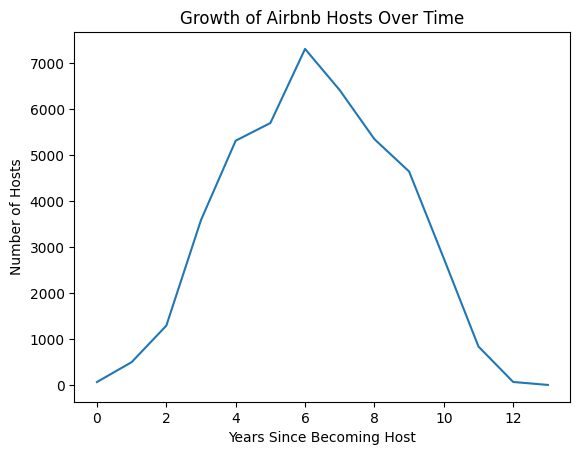

In [43]:
host_growth_by_year = df1234.groupby('host_tenure_years').size()
host_growth_by_year.plot(kind='line')
plt.xlabel('Years Since Becoming Host')
plt.ylabel('Number of Hosts')
plt.title('Growth of Airbnb Hosts Over Time')
plt.show()

The line graph depicts the growth of Airbnb hosts over time, with the number of years since they first became a host on the platform being used as the measure. 

During the early years, there was a steady and rapid increase in the number of hosts, indicating that Airbnb was gaining popularity and becoming more prevalent in the analyzed location. 

The graph shows a peak at approximately 6 years since becoming a host, indicating that this was the time when most hosts joined the platform. This could be attributed to a variety of factors, such as increased popularity, significant market events, or targeted promotions. 

After reaching the peak, there was a sharp decline in the number of hosts who had been on the platform for more than 6 years. This could be due to a decrease in new sign-ups after a boom period or a natural drop-off as hosts left the platform for various reasons, such as market saturation, increased competition, changes in local regulations, or personal choices. 

The number of hosts who remained on the platform for the longest period (10 to 12+ years) was relatively small, as this category only included early adopters. 

It is difficult to determine the specific reason for the decline after the peak without additional context or data. The decline could be the result of recent global events like the COVID-19 pandemic affecting travel and accommodation businesses, or it could reflect changes in Airbnb's market dynamics or user base over time.

In [44]:
average_scores = df1234.groupby('host_is_superhost')['review_scores_rating'].mean()
print(average_scores)

host_is_superhost
False    25.606139
True     26.890758
Name: review_scores_rating, dtype: float64


The output we are seeing is the result of calculating the mean review_scores_rating grouped by host_is_superhost status. It shows the average review score rating for two categories: hosts who are not superhosts (False) and hosts who are superhosts (True).

Hosts who are not superhosts have an average review score rating of approximately 25.63.
Hosts who are superhosts have an average review score rating of approximately 27.32.

This suggests that, on average, superhosts have higher review scores than non-superhosts. Superhosts are typically characterized by providing exceptional service, being very responsive, and maintaining high overall guest satisfaction, which can translate into higher review scores.


In [45]:
df1234['review_scores_rating'].unique()

array([  4.5 ,   4.81,   4.56,   4.8 ,   4.92,   4.68,   5.  ,   4.39,
         4.44,   4.24,   4.94,   4.62,   4.65,   4.74,   4.49,   4.7 ,
         4.19,   4.73,   4.87,   4.25,   4.  ,   4.76,   4.78,   4.84,
         4.07,   4.63,   4.72,   4.85,   4.95,   4.67,   4.43,   4.75,
         4.45,   4.93,   4.51,   4.89,   4.64,   4.54,   4.58,   4.98,
         4.83,   4.66,   4.88,   4.69,   4.28,   4.17,   4.09,   4.91,
         3.67,   4.22,   4.77,   4.16,   4.59,   4.79,   4.53,   4.71,
         4.82,   4.18,   4.6 ,   3.25,   4.3 ,   4.4 ,   4.42,   4.38,
         4.9 ,   4.47,   4.61,   4.52,   4.31,   4.86,   4.27,   4.35,
         4.57,   4.29,   4.48,   3.88,   4.55,   4.96,   4.46,   4.33,
         3.98,   4.41,   4.34,   4.36,   4.13,   2.67,   4.2 ,   3.5 ,
         4.37,   4.15,   4.97,   3.75,   4.32,   4.14,   4.1 ,   4.26,
         2.  ,   3.  ,   4.12,   1.  ,   3.4 ,   4.23,   3.8 ,   0.  ,
         3.33,   3.57,   4.21,   3.29,   3.89,   3.82,   4.02,   3.83,
      

In [46]:
df1234['review_scores_rating'] = df1234['review_scores_rating'].apply(functions.standardize_scores)

In [47]:
display (df1234['review_scores_rating'].unique())

array([4.5 , 4.81, 4.56, 4.8 , 4.92, 4.68, 0.25, 4.39, 4.44, 4.24, 4.94,
       4.62, 4.65, 4.74, 4.49, 4.7 , 4.19, 4.73, 4.87, 4.25, 4.  , 4.76,
       4.78, 4.84, 4.07, 4.63, 4.72, 4.85, 4.95, 4.67, 4.43, 4.75, 4.45,
       4.93, 4.51, 4.89, 4.64, 4.54, 4.58, 4.98, 4.83, 4.66, 4.88, 4.69,
       4.28, 4.17, 4.09, 4.91, 3.67, 4.22, 4.77, 4.16, 4.59, 4.79, 4.53,
       4.71, 4.82, 4.18, 4.6 , 3.25, 4.3 , 4.4 , 4.42, 4.38, 4.9 , 4.47,
       4.61, 4.52, 4.31, 4.86, 4.27, 4.35, 4.57, 4.29, 4.48, 3.88, 4.55,
       4.96, 4.46, 4.33, 3.98, 4.41, 4.34, 4.36, 4.13, 2.67, 4.2 , 3.5 ,
       4.37, 4.15, 4.97, 3.75, 4.32, 4.14, 4.1 , 4.26, 2.  , 3.  , 4.12,
       1.  , 3.4 , 4.23, 3.8 , 0.  , 3.33, 3.57, 4.21, 3.29, 3.89, 3.82,
       4.02, 3.83, 4.08, 3.6 , 3.95, 3.63, 4.04, 4.05, 3.64, 3.7 , 4.99,
       4.03, 4.11, 3.86, 2.5 , 3.43, 2.43, 3.9 , 1.8 , 3.93, 3.71, 3.92,
       4.06, 3.54, 3.94, 1.67, 3.62, 1.5 , 3.78, 3.96, 3.85, 3.17, 3.81,
       2.86, 3.15, 3.58, 3.73, 2.75, 3.91, 3.2 , 2.

In [48]:
df1234 = df1234.dropna(subset=['review_scores_rating'])

display(df1234['review_scores_rating'].isnull().sum())


0

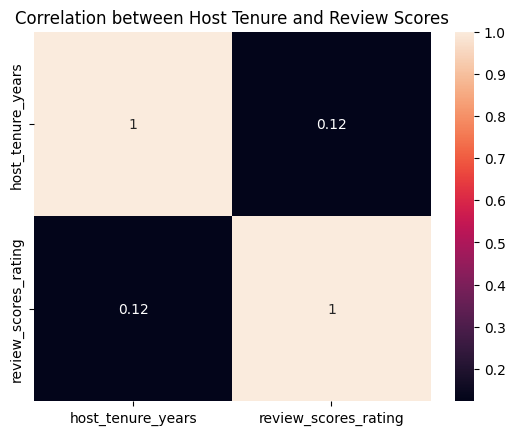

In [49]:
correlation_matrix = df1234[['host_tenure_years', 'review_scores_rating']].corr()

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation between Host Tenure and Review Scores')
plt.show()


The following text discusses the correlation between two variables: host tenure (the number of years a host has been active on Airbnb) and review scores. The correlation coefficient between these two variables is 0.12. 

A correlation coefficient of 0.12 is considered close to zero, indicating virtually no linear relationship between the length of time a host has been active on Airbnb and their review scores. This means that tenure does not significantly affect a host's review scores, at least not in a linearly predictable manner. 

It's important to note that other factors will likely significantly impact review scores. These factors could include the quality of the listing, the accuracy of the description, the cleanliness of the space, the experience guests have during their stay, and the host's attentiveness and communication. 

When interpreting correlation coefficients, it's essential to remember that they only measure linear relationships. There's a possibility that two variables might have a non-linear relationship that a Pearson correlation coefficient would not capture. Additionally, a lack of correlation does not necessarily mean no ties. It just means that there's no linear relationship detectable by this particular statistical measure. 

This finding implies that while experience might be valuable for Airbnb hosts and the platform itself, it doesn't guarantee better reviews. Therefore, ongoing efforts to maintain and improve quality are crucial regardless of how long someone has been hosting.

In [50]:
spearman_corr = df1234['host_tenure_years'].corr(df1234['review_scores_rating'], method='spearman')
print(f"Spearman Correlation: {spearman_corr}")

Spearman Correlation: 0.033527044837496606


A Spearman correlation of approximately 0.03 suggests virtually no linear relationship between the ranks of the two variables examined. This implies that, as the rank order of one variable increases, there is no predictable pattern to the change in the rank order of the other variable. This result concludes that, based on the data, there's insufficient evidence to suggest a meaningful association between the two variables.

In [51]:
df1234['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [52]:
display(df1234['room_type'].isnull().sum())

0

/var/folders/sy/44z17tzs0lbfyhpp1k3p508c0000gn/T/ipykernel_92451/2062176142.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='room_type', y='review_scores_rating', data=df1234, palette=colors)


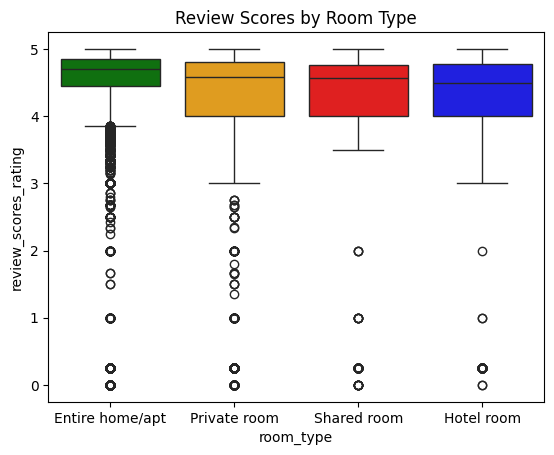

In [53]:
colors= ['green', 'orange', 'red', 'blue']
sns.boxplot(x='room_type', y='review_scores_rating', data=df1234, palette=colors)
plt.title('Review Scores by Room Type')
plt.show()

The box plot illustrates how review scores are distributed among different types of Airbnb rooms, such as Entire homes/apartments, Private rooms, Shared rooms, and Hotel rooms.

The median score for all room types is above 3, implying high satisfaction levels across all categories. However, "Entire home/apt" has the highest median score, while "Shared room" has the lowest, though the difference isn't significant.

The boxes in the plot represent the middle 50% of scores for each room type. It appears that "Entire home/apt" and "Hotel room" have a slightly narrower Interquartile Range than "Private room" and "Shared room," indicating less variability in guest satisfaction within the former types.

The dots below and above the boxes represent outliers, scores outside the typical range. All room types have outliers, with "Private room" and "Shared room" having more pronounced outlier scores on the lower end, indicating significantly lower guest satisfaction.

The "Entire home/apt" and "Hotel room" types show higher consistency in guest satisfaction with fewer low-score outliers. This might indicate that these accommodations more reliably meet or exceed guest expectations.

"Entire home/apt" has the most comprehensive range, suggesting more variation in scores, while "Hotel room" has the narrowest range, indicating more consistency.

Overall, this plot suggests that while all room types generally receive good reviews, entire homes/apartments and hotel rooms tend to have a slightly higher and more consistent guest satisfaction rating than private and shared rooms. Shared rooms seem to have the most variability in guest satisfaction, as evidenced by the wider box and range of outliers.

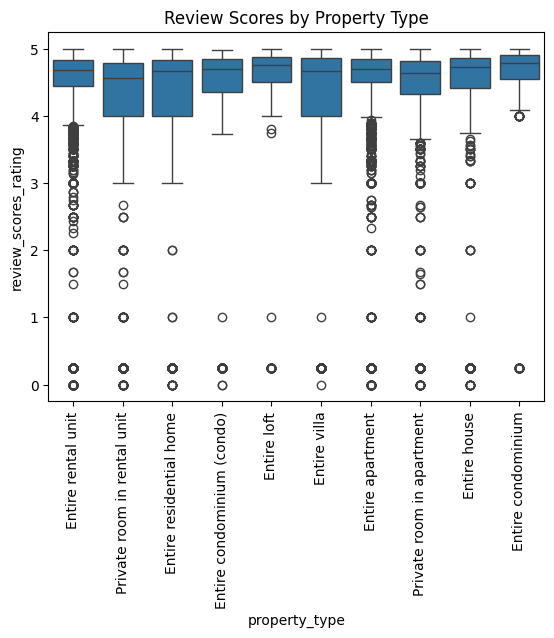

In [54]:
top_property_types = df1234['property_type'].value_counts().nlargest(10).index
sns.boxplot(x='property_type', y='review_scores_rating', data=df1234[df1234['property_type'].isin(top_property_types)])
plt.xticks(rotation=90)
plt.title('Review Scores by Property Type')
plt.show() #this as to change because the new category

The box plot is a visualization of the review scores given by guests for different property types on Airbnb. Each box represents the range of review scores for a particular property type, with the median score indicated by a line across the box.

All property types have a median review score above 3, which indicates that they have generally received positive reviews. The median scores for different types of properties appear to be relatively consistent, with no dramatic variations. This suggests that guests' satisfaction does not heavily depend on the property type.

The interquartile range is similar across most property types, which indicates a consistent level of guest satisfaction. However, a few property types have slightly tighter interquartile ranges, indicating less variability in guest ratings.

There are outliers for all property types, both on the lower and higher ends, but mainly on the lower back. This suggests that some listings significantly underperform in guest satisfaction regardless of property type.

Most property types show a similar distribution pattern, with the majority of scores falling between 4 and 5, and outliers scattered below the lower range. This suggests a degree of consistency in guest experiences across different property types.

The range indicates that some guests rated their experiences on the lower end for every property type. However, the majority of scores are concentrated towards the upper back.

From this plot, we can infer that while the property type does not significantly affect the median review score, individual listings within each category can vary considerably in the quality of the guest experience they provide. The consistency of median scores near the upper end of the scale also indicates that most guests are satisfied with their Airbnb experience across various property types. The presence of outliers suggests that individual host performance and specific listing qualities are likely more critical in determining guest satisfaction than the property type alone.

In [62]:
anova_results = stats.f_oneway(
    df1234[df1234['room_type'] == 'Entire home/apt']['review_scores_rating'],
    df1234[df1234['room_type'] == 'Private room']['review_scores_rating'],
    df1234[df1234['room_type'] == 'Shared room']['review_scores_rating']
)

print(f"ANOVA test results for room type and review scores: F-statistic = {anova_results.statistic}, p-value = {anova_results.pvalue}")

ANOVA test results for room type and review scores: F-statistic = 320.13802457338085, p-value = 9.687190053356699e-139


The ANOVA test results are of great significance. The F-statistic measures the variation in review scores that is explained by the difference in means across room types. A value as large as 320.14 suggests a strong statistical significance. 

The p-value indicates the probability of observing the results by random chance. With a p-value of 9.687190053356699e-139, which is practically zero, the probability of seeing such a strong effect due to chance is virtually non-existent. 

As a result, we can reject the null hypothesis, which states that there are no differences in mean review scores across different room types. Instead, we can confidently conclude that there are statistically significant differences in review scores among the various room types on Airbnb. 

This implies that the type of room has a significant impact on how guests rate their stays. This effect is not marginal, but rather a robust factor that influences guest satisfaction, as demonstrated by the large F-statistic value. 

With this knowledge, further research can be conducted to identify which room types are rated higher or lower and why. This can provide valuable insights to hosts about which room types are more likely to satisfy guests and potentially inform strategic decisions by Airbnb or its hosts regarding which types of rooms to offer or highlight.

In [60]:
# Option-1
# f_oneway anova between the:
# review_scores_rating and the different room_type
# review_scores_rating and the different property_type

# Option-2
# two-sample t-test to compare means.
# compute the mean review score rating for all the room_types and all the property_type. Then check wether or not those
# two means are the same or not.

In [61]:
for column in df1234.columns:
    print(f'{column} : {df1234[column].nunique()}')

id : 16979
listing_url : 16979
scrape_id : 4
last_scraped : 25
name : 17481
description : 17741
neighborhood_overview : 9548
picture_url : 17876
host_id : 7986
host_url : 7986
host_name : 3153
host_since : 2970
host_location : 889
host_about : 4553
host_response_time : 4
host_response_rate : 69
host_acceptance_rate : 96
host_is_superhost : 2
host_thumbnail_url : 8546
host_picture_url : 8546
host_neighbourhood : 124
host_listings_count : 115
host_total_listings_count : 115
host_verifications : 300
host_has_profile_pic : 2
host_identity_verified : 2
neighbourhood : 479
neighbourhood_cleansed : 124
neighbourhood_group_cleansed : 16
latitude : 8488
longitude : 9967
property_type : 95
room_type : 4
accommodates : 16
bathrooms : 0
bathrooms_text : 49
bedrooms : 15
beds : 29
amenities : 42298
price : 584
minimum_nights : 56
maximum_nights : 184
minimum_minimum_nights : 57
maximum_minimum_nights : 70
minimum_maximum_nights : 165
maximum_maximum_nights : 176
minimum_nights_avg_ntm : 292
maximum

In [62]:
df1234['price'].unique()

array(['$40.00', '$50.00', '$60.00', '$957.00', '$122.00', '$65.00',
       '$80.00', '$250.00', '$47.00', '$49.00', '$57.00', '$137.00',
       '$95.00', '$51.00', '$22.00', '$99.00', '$68.00', '$103.00',
       '$66.00', '$69.00', '$132.00', '$63.00', '$90.00', '$143.00',
       '$130.00', '$64.00', '$55.00', '$45.00', '$58.00', '$31.00',
       '$30.00', '$79.00', '$77.00', '$78.00', '$85.00', '$118.00',
       '$67.00', '$74.00', '$94.00', '$25.00', '$105.00', '$70.00',
       '$150.00', '$54.00', '$35.00', '$152.00', '$135.00', '$200.00',
       '$110.00', '$100.00', '$72.00', '$217.00', '$119.00', '$88.00',
       '$155.00', '$120.00', '$15.00', '$82.00', '$59.00', '$52.00',
       '$89.00', '$400.00', '$26.00', '$75.00', '$140.00', '$245.00',
       '$126.00', '$109.00', '$560.00', '$33.00', '$27.00', '$28.00',
       '$300.00', '$141.00', '$96.00', '$173.00', '$146.00', '$53.00',
       '$714.00', '$41.00', '$42.00', '$61.00', '$56.00', '$224.00',
       '$241.00', '$44.00', '$

In [63]:
df1234['price'] = df1234['price'].str.replace('$','')

In [64]:
df1234['price'].unique()

array(['40.00', '50.00', '60.00', '957.00', '122.00', '65.00', '80.00',
       '250.00', '47.00', '49.00', '57.00', '137.00', '95.00', '51.00',
       '22.00', '99.00', '68.00', '103.00', '66.00', '69.00', '132.00',
       '63.00', '90.00', '143.00', '130.00', '64.00', '55.00', '45.00',
       '58.00', '31.00', '30.00', '79.00', '77.00', '78.00', '85.00',
       '118.00', '67.00', '74.00', '94.00', '25.00', '105.00', '70.00',
       '150.00', '54.00', '35.00', '152.00', '135.00', '200.00', '110.00',
       '100.00', '72.00', '217.00', '119.00', '88.00', '155.00', '120.00',
       '15.00', '82.00', '59.00', '52.00', '89.00', '400.00', '26.00',
       '75.00', '140.00', '245.00', '126.00', '109.00', '560.00', '33.00',
       '27.00', '28.00', '300.00', '141.00', '96.00', '173.00', '146.00',
       '53.00', '714.00', '41.00', '42.00', '61.00', '56.00', '224.00',
       '241.00', '44.00', '76.00', '46.00', '32.00', '350.00', '20.00',
       '180.00', '160.00', '274.00', '38.00', '220.00', 

In [65]:
df1234['price'] = df1234['price'].str.replace(',', '').astype(float).astype(int)

In [66]:
df1234['price'].unique()

array([   40,    50,    60,   957,   122,    65,    80,   250,    47,
          49,    57,   137,    95,    51,    22,    99,    68,   103,
          66,    69,   132,    63,    90,   143,   130,    64,    55,
          45,    58,    31,    30,    79,    77,    78,    85,   118,
          67,    74,    94,    25,   105,    70,   150,    54,    35,
         152,   135,   200,   110,   100,    72,   217,   119,    88,
         155,   120,    15,    82,    59,    52,    89,   400,    26,
          75,   140,   245,   126,   109,   560,    33,    27,    28,
         300,   141,    96,   173,   146,    53,   714,    41,    42,
          61,    56,   224,   241,    44,    76,    46,    32,   350,
          20,   180,   160,   274,    38,   220,   291,   382,   185,
         189,   331,    93,    81,    71,    97,   144,    24,    91,
          87,   114,    98,   159,   102,   125,    86,   175,    83,
         163,    36,    39,    84,   198,   195,   289,    92,    43,
         107,    62,

In [67]:
min_price = df1234['price'].min()
print(f"Minimum price: {min_price}")

Minimum price: 8


In [68]:
max_price = df1234['price'].max()
print(f"Maximum price: {max_price}")

Maximum price: 20534


In [69]:
df1234['price'].describe()

count    43783.000000
mean        93.327319
std        227.940663
min          8.000000
25%         48.000000
50%         68.000000
75%        100.000000
max      20534.000000
Name: price, dtype: float64

In [70]:
df1234['price'].unique()

array([   40,    50,    60,   957,   122,    65,    80,   250,    47,
          49,    57,   137,    95,    51,    22,    99,    68,   103,
          66,    69,   132,    63,    90,   143,   130,    64,    55,
          45,    58,    31,    30,    79,    77,    78,    85,   118,
          67,    74,    94,    25,   105,    70,   150,    54,    35,
         152,   135,   200,   110,   100,    72,   217,   119,    88,
         155,   120,    15,    82,    59,    52,    89,   400,    26,
          75,   140,   245,   126,   109,   560,    33,    27,    28,
         300,   141,    96,   173,   146,    53,   714,    41,    42,
          61,    56,   224,   241,    44,    76,    46,    32,   350,
          20,   180,   160,   274,    38,   220,   291,   382,   185,
         189,   331,    93,    81,    71,    97,   144,    24,    91,
          87,   114,    98,   159,   102,   125,    86,   175,    83,
         163,    36,    39,    84,   198,   195,   289,    92,    43,
         107,    62,

In [71]:
median_prices_by_property_type = df1234.groupby('property_type')['price'].median()

print(median_prices_by_property_type)

property_type
Barn                         60.0
Boat                         70.0
Bus                          50.0
Camper/RV                    71.0
Campsite                     13.5
                            ...  
Shared room in townhouse     23.0
Tiny house                   58.0
Treehouse                   111.0
Windmill                     82.0
Yurt                         71.0
Name: price, Length: 95, dtype: float64


In [72]:
df1234['property_type'].unique()

array(['Entire rental unit', 'Private room in rental unit',
       'Entire residential home', 'Entire guest suite',
       'Entire condominium (condo)', 'Entire serviced apartment',
       'Private room in villa', 'Entire cottage',
       'Private room in residential home', 'Entire loft', 'Tiny house',
       'Entire townhouse', 'Entire cabin',
       'Private room in bed and breakfast', 'Entire chalet',
       'Entire villa', 'Casa particular', 'Private room in guest suite',
       'Entire guesthouse', 'Room in boutique hotel',
       'Private room in hostel', 'Shared room in rental unit',
       'Shared room in hostel', 'Private room in guesthouse',
       'Room in bed and breakfast', 'Windmill', 'Private room in resort',
       'Private room in townhouse', 'Private room in cottage',
       'Shared room in residential home', 'Entire bed and breakfast',
       'Private room in nature lodge', 'Earth house',
       'Private room in castle', 'Private room in condominium (condo)',
       

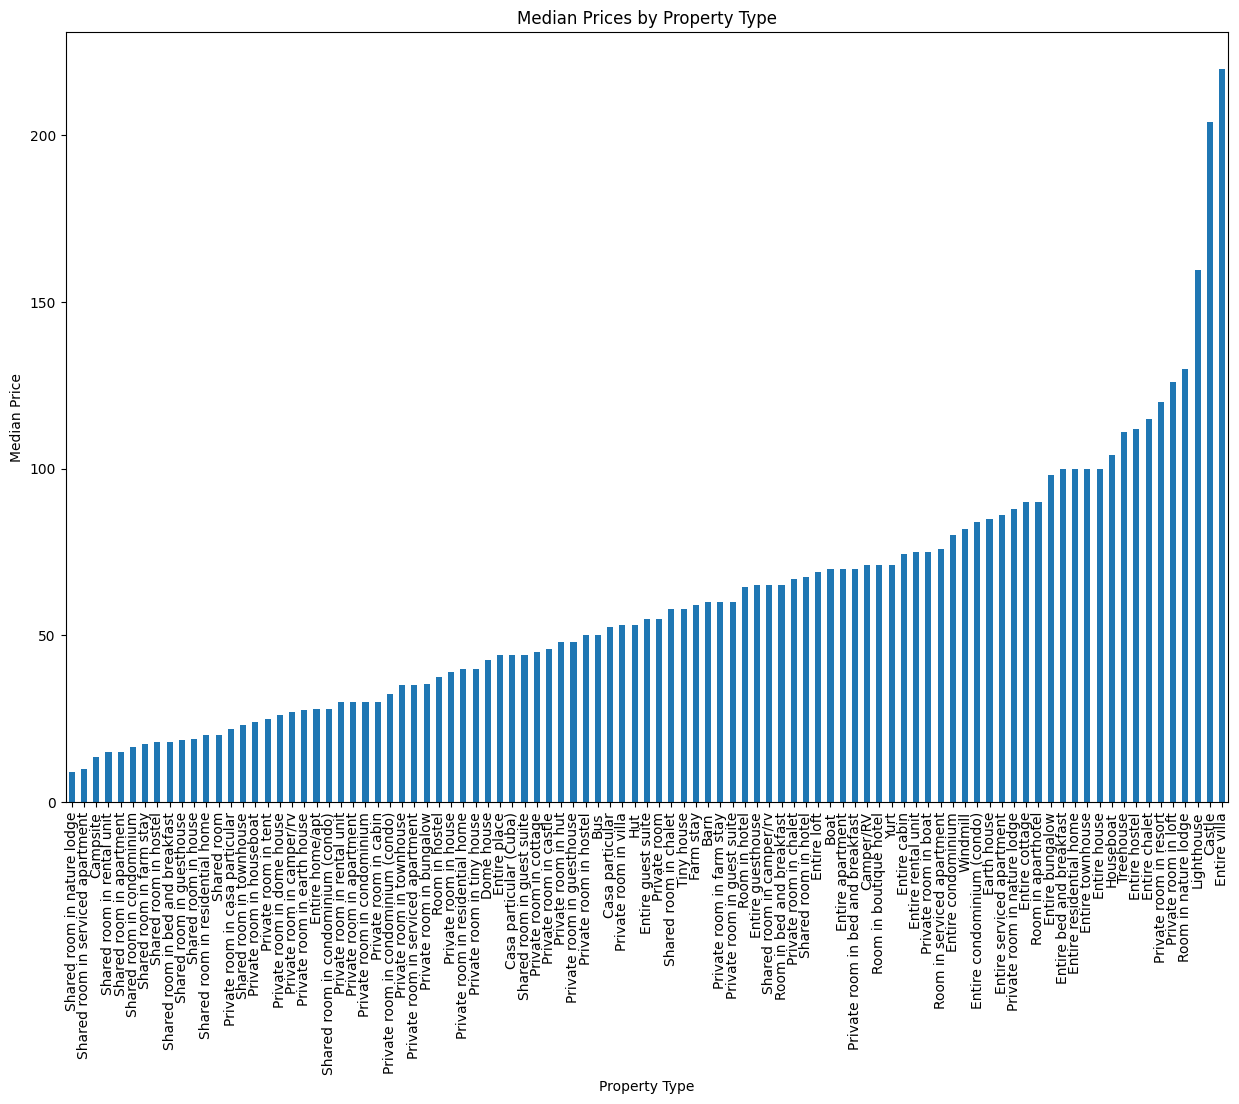

In [73]:
median_prices_by_property_type = df1234.groupby('property_type')['price'].median().sort_values()

plt.figure(figsize=(15, 10))
median_prices_by_property_type.plot(kind='bar')
plt.title('Median Prices by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Median Price')
plt.xticks(rotation=90)
plt.show()

we cant read this plot, so we must follow other direction... :'(

In [74]:
property_type_mapping = {
    'Entire rental unit': 'Entire Place',
    'Entire residential home': 'Entire Place',
    'Entire condominium (condo)': 'Entire Place',
    'Entire serviced apartment': 'Entire Place',
    'Entire loft': 'Entire Place',
    'Entire townhouse': 'Entire Place',
    'Entire villa': 'Entire Place',
    'Entire guesthouse': 'Entire Place',
    'Entire cabin': 'Entire Place',
    'Entire bungalow': 'Entire Place',
    'Entire cottage': 'Entire Place',
    'Entire chalet': 'Entire Place',
    'Entire bed and breakfast': 'Entire Place',
    'Entire place': 'Entire Place',
    'Entire apartment': 'Entire Place',
    'Entire house': 'Entire Place',
    'Entire condominium': 'Entire Place',
    'Entire vacation home': 'Entire Place',
    'Entire guest suite': 'Entire Place',
    'Private room in rental unit': 'Private Room',
    'Private room in residential home': 'Private Room',
    'Private room in bed and breakfast': 'Private Room',
    'Private room in villa': 'Private Room',
    'Private room in guest suite': 'Private Room',
    'Private room in nature lodge': 'Private Room',
    'Private room in condominium (condo)': 'Private Room',
    'Private room in townhouse': 'Private Room',
    'Private room in cottage': 'Private Room',
    'Private room in tiny house': 'Private Room',
    'Private room in boat': 'Private Room',
    'Private room in chalet': 'Private Room',
    'Private room in guesthouse': 'Private Room',
    'Private room': 'Private Room',
    'Private room in casa particular': 'Private Room',
    'Private room in loft': 'Private Room',
    'Private room in hut': 'Private Room',
    'Private room in dome house': 'Private Room',
    'Private room in apartment': 'Private Room',
    'Private room in house': 'Private Room',
    'Private room in condominium': 'Private Room',
    'Private room in houseboat': 'Private Room', 
    'Shared room in rental unit': 'Shared Room',
    'Shared room in residential home': 'Shared Room',
    'Shared room in bed and breakfast': 'Shared Room',
    'Shared room in townhouse': 'Shared Room',
    'Shared room in guest suite': 'Shared Room',
    'Shared room in guesthouse': 'Shared Room',
    'Shared room in farm stay': 'Shared Room',
    'Shared room in nature lodge': 'Shared Room',
    'Shared room in loft': 'Shared Room',
    'Shared room in apartment': 'Shared Room',
    'Shared room in house': 'Shared Room',
    'Shared room in condominium': 'Shared Room',
    'Shared room in camper/rv': 'Shared Room', 
    'Barn': 'Unique Stay',
    'Boat': 'Unique Stay',
    'Bus': 'Unique Stay',
    'Camper/RV': 'Unique Stay',
    'Campsite': 'Unique Stay',
    'Treehouse': 'Unique Stay',
    'Windmill': 'Unique Stay',
    'Yurt': 'Unique Stay',
    'Tent': 'Unique Stay',
    'Lighthouse': 'Unique Stay',
    'Houseboat': 'Unique Stay',
    'Hut': 'Unique Stay',
    'Earth house': 'Unique Stay',
    'Dome house': 'Unique Stay',
}

In [75]:
df1234['property_type_mapping'] = df1234['property_type'].map(property_type_mapping)

In [76]:
df1234.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [77]:
median_prices_by_category = df1234.groupby('property_type_mapping')['price'].median().sort_values()

In [78]:
median_prices_df1234 = median_prices_by_category.reset_index()

In [79]:
colormap = plt.cm.get_cmap('Set3', len(median_prices_df1234))
colors = colormap(range(len(median_prices_df1234)))

/var/folders/sy/44z17tzs0lbfyhpp1k3p508c0000gn/T/ipykernel_72008/3210511942.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('Set3', len(median_prices_df1234))


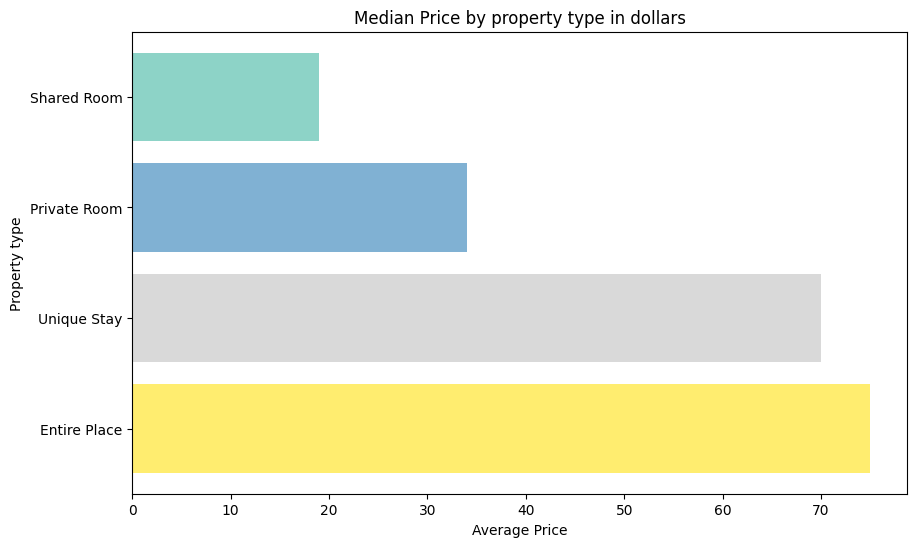

In [80]:
plt.figure(figsize=(10, 6))
plt.barh(median_prices_df1234['property_type_mapping'], median_prices_df1234['price'], color=colors)
plt.xlabel('Average Price')
plt.ylabel('Property type')
plt.title('Median Price by property type in dollars')
plt.gca().invert_yaxis()
plt.show()

The bar chart titled "Median Price by Property Type in Dollars" displays the median prices for different types of properties. 

The yellow bar represents the category 'Entire Place,' which has the highest median price among the categories shown. This suggests that renting an entire home or apartment commands a higher price compared to shared spaces.

The gray bar represents 'Unique Stay,' which likely includes unconventional property types like treehouses, yurts, or boats. The median price for unique stays is lower than for entire places, but higher than for private and shared rooms.

The blue bar indicates 'Private Room,' with a lower median price than entire places and unique stays. This aligns with the expectation that renting only a private room within a property would be less expensive than renting the entire property.

The green bar at the top represents 'Shared Room,' which has the lowest median price. This is consistent with the nature of shared rooms being the most economical option for travelers.

The chart effectively communicates that the median price decreases as privacy decreases: from an entire place to a private room and then to a shared room. Unique stays are priced variably, potentially due to their distinctive characteristics that can sometimes command a premium.